
## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do


해당 데이터는 지금은 업데이트가 되고 있지 않는 데이터셋 입니다.
최근 데이터로 실습을 하시면 변경된 내용이 많아 당황하실 수 있습니다. 

In [6]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [7]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"seoul-covid19_6_30_.csv"
file_name

'seoul-covid19_6_30_.csv'

In [8]:
# 아래 코드의 주석을 풀고 바로 읽어올 수도 있습니다.
# pd.read_csv("https://raw.githubusercontent.com/corazzon/cracking-the-pandas-cheat-sheet/master/seoul-covid19_6_30_.csv") 
# read_csv 로 csv 파일을 불러와 주세요.
df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(1321, 7)

In [9]:
# "연번"을 기준으로 역순으로 정렬합니다.
# sort_index, sort_values
df = df.sort_values(by="연번", ascending=False)

In [10]:
# head 로 미리보기를 합니다.

df.head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원


In [11]:
# tail 로 미리보기를 합니다.

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
1320,1,2,1.24.,강서구,중국 우한시,해외 접촉,국립중앙의료원(퇴원)


## 시각화 도구 불러오기

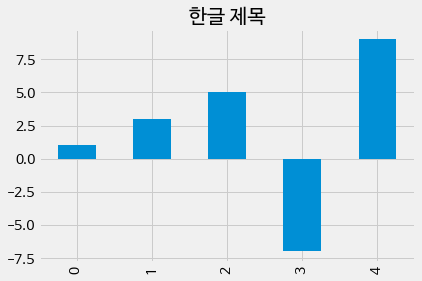

In [12]:
# 시각화 연습
import pandas as pd
import matplotlib.pyplot as plt
# from IPython.core.display import set_matplotlib_formats
# set_matplotlib_formats("retina")
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("fivethirtyeight")

# plt.rc(font", family="사용환경 별 폰트 선언") 
# "Malgun Gothic": 윈도우용 "AppleGothic": MacOS 사용자

"""
[ colab 환경 사용자는 아래와 같이 진행 해주세요. ]

STEP 1. 나눔 폰트 설치 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

STEP 2. 코랩(Colab)의 런타임을 재시작 합니다.
런타입 텝 > 런타임 다시 시작   또는 단축키 (ctrl + m +.)

Step 3. matplotlib의 폰트를 Nanum 폰트로 지정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

"""
# pd.Series([1,3,5,7,9]).plot()
# pd.Series([1,3,5,7,9]).plot.bar()
# pd.Series([1,3,5,7,9]).plot.bar(title="한글 제목") # 에러 발생 시 위 부분 보고 해결

#pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")
# plot 차트에 -  값 깨지는 거 방지를 위해 아래 정보 선언
plt.rc("axes", unicode_minus=False)
pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

In [13]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic') 


### 시각화 선명하게 설정하기

In [14]:
from IPython.core.display import set_matplotlib_formats
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

# from  IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")  # retina 지원 해주면 적용됨 ... 아  맥 사고 싶다.

## 확진일

In [15]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
# 결과 단계 별로 확인 필요

# df
# df["확진일"]  # Length: 1321  건 , dtype: object 
df["확진일"].value_counts()  # value_counts 는 수치형 데이터를 카운터 할때도 사용할 수 있지만 
                            # 주로 object 타입의 빈도수를 카운터 할때 사용

3.10.    46
6.12.    30
6.06.    29
6.05.    27
3.9.     26
         ..
4.20.     1
4.19.     1
4.18.     1
4.15.     1
1.24.     1
Name: 확진일, Length: 131, dtype: int64

In [16]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)   # 6.30. 이라는 데이터가 object 타입임을 나타냄


0    6.30.
Name: 확진일, dtype: object

In [17]:
# 데이터 타입을 변경해서 날짜형태로 변환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "-" 문자로 날짜를 연결해 줍니다.


#df["확진일"]
# . 을 -로 변경 
# df["확진일"].replace(".","-")
# 이렇게 하면 변경되지 않는데 이유는 현재 데이터가 object 이기 때문에 
# replace가  6.30. 이 아닌  ..... 형태로 되어 있어가 가능
# 그래서 object 값을 str 형태로 변경하여 처리하면 적용가능

# df["확진일"].str.replace(".","-") 
# "2020-" + df["확진일"].str.replace(".","-")

#마지막으로 to_datetime 을 이용하여 datetiem  타입으로 변경
pd.to_datetime("2020-"+df["확진일"].str.replace(".","-"))
df["확진일"]
df["확진일자"] = pd.to_datetime("2020-"+df["확진일"].str.replace(".","-"))
# df["확진일", "확진일자"]  # 에러가 나는 이유는?    [] 한개는 Series 1행렬을 의미 우리가 다루는 값은 2차 행렬이기 때문에
df[["확진일", "확진일자"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


,확진일,확진일자
0,6.30.,2020-06-30
1,6.30.,2020-06-30
2,6.30.,2020-06-30
3,6.30.,2020-06-30
4,6.30.,2020-06-30


In [18]:
# 월만 추출합니다. 
# .dt 옵션을 이용하면 날짜 옵션을 사용할 수 있다.

# dt.month 를 통해 2020-06-30 중 6월을 추출
# df["확진일자"].dt.month
df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].tail()

,확진일,확진일자,월
1316,1.31.,2020-01-31,1
1317,1.30.,2020-01-30,1
1318,1.30.,2020-01-30,1
1319,1.30.,2020-01-30,1
1320,1.24.,2020-01-24,1


In [19]:
# 해당 연도의 몇번째 "주"인지 추출합니다.

# df["확진일자"].dt.week
df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,확진일,확진일자,월,주
0,6.30.,2020-06-30,6,27
1,6.30.,2020-06-30,6,27
2,6.30.,2020-06-30,6,27
3,6.30.,2020-06-30,6,27
4,6.30.,2020-06-30,6,27


### 선그래프 그리기
[Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

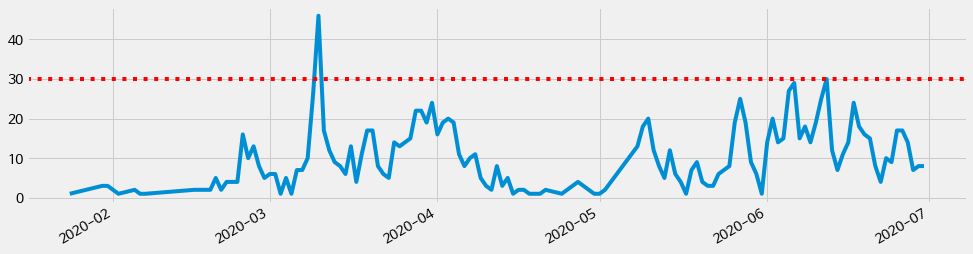

In [121]:
# 확진일자로 선그래프를 그립니다.

#df["확진일자"]
# df["확진일자"].value_counts()  3월 달에 확진자가 많아서 그래프가 튄다
# df["확진일자"].value_counts().plot()
df["확진일자"].value_counts().plot(figsize=(15,4))  # 1월 24일 부터 6월 30 일까지 
# 선긋기
plt.axhline(30, color="red", linestyle=":")

### 선그래프에 값 표시하기

In [134]:
 
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.

#df
# 확잔일자 부분만 가져오기
#df["확진일자"]
# 위 그래프에서 2020-02  처럼 2020- 부분을 지우고 월만 출력 하고자 한다.
# 확진일자에 출력 되는 2020-06-30 문자중  뒤에서 5글자만 출력 하게한다.  슬라이싱 사용  [-5:]
# df["확진일자"].astype(str).map(lambda x: x[-5:])
df["월일"] = df["확진일자"].astype(str).map(lambda x: x[-5:])
df["월일"]
# df["월일"].value_counts().plot() # 여기서 df["월일"] 의 datetime 형식이 아니다 그래서 sort 시켜주자
#df["월일"].value_counts().sort_index().plot()
day_count = df["월일"].value_counts().sort_index()
#day_count.loc[0] # loc 는 인덱스 값을 접근이 안된다.
day_count.iloc[2]

3

In [144]:
# day_count 확진자가 발생한 날 
#len(day_count)

for i in range(len(day_count)):
  print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 8


Text(2, 5, 'test3')

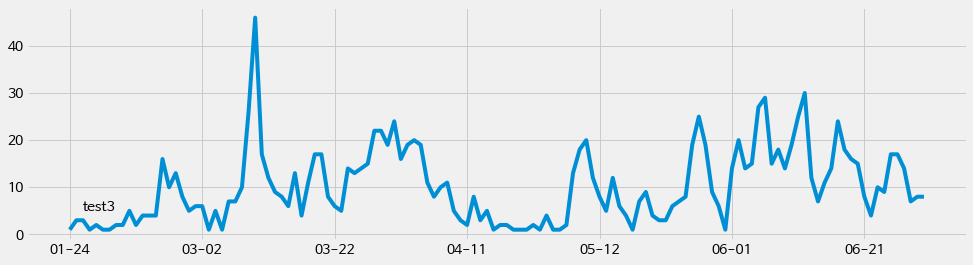

In [142]:
#g = day_count.plot(figsize=(15,4))
#g 

# 이렇게  하면 아래  <matplotlib.axes._subplots.AxesSubplot at 0x7f7c1193fed0> 
# 값이 같이 찍힌다.
# 만약 깔끔하게 나오게 한다면 g = day_count.plot(figsize=(15,4))
#변수에 선언해서 깔끔하게 나온다.
g = day_count.plot(figsize=(15,4))
g.text(x=2, y=5, s="test3")     # 옵션볼때 shift 키 + tab 키   x, y 좌표, string을 출력

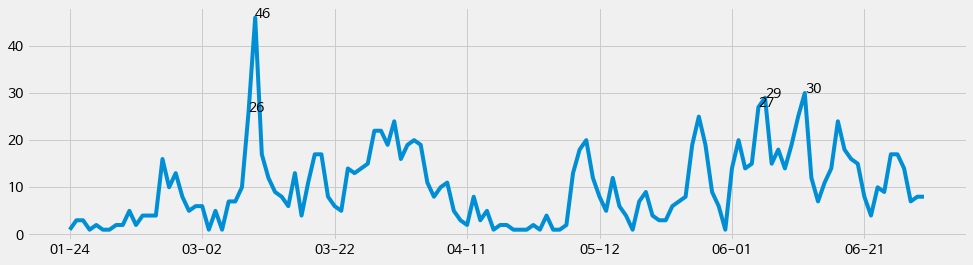

In [148]:
# g = day_count.plot(figsize=(15,4))
# for i in range(len(day_count)):
#   case_count = day_count.iloc[i]
#   g.text(x=i, y=case_count, s=case_count)  # 이렇게 출력 하니 너무 빡빡하게 나왔다.

# 특정 조건을 넣어서 출력 
g = day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
  case_count = day_count.iloc[i]
  if case_count > 25:
    g.text(x=i, y=case_count, s=case_count) 
    # 만약 출력 부분을 조금씩 가운데로 조정 하고 싶다고 하면 
    # (x=i-0.5, y=case_count, s=case_count)  형태로 변경하면 된다. 


### 확진자가 가장 많이 나온 날

In [150]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.
"""
데이터프레임(일반적으로 CSV 데이터) 전체의 요약정보 (주로 요약통계량)를 확인할 경우
df.describe()

Count : 컬럼별 총 데이터수
mean / std :  컬럼별 데이터의 평균 / 표준편차
min / max  :  컬럼별 데이터 최소값 / 최대값
25% / 50% / 75% : 백분위수의 각 지점으로, 분포를 반영해 평균을 보완하는 목적으로 사용


"""
#day_count  # Series 형태로 되어 있음
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [154]:
# 확진자가 가장 많았던 날을 찾습니다.
#day_count.max()

#day_count == day_count.max()
#day_count == day_count.max()   # 해당 값만 가져오려면 day_count[]  값으로 감싸면 됨
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [161]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df["월일"] == "03-10"
df[df["월일"] == "03-10"]

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1124,197,7524,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1125,196,7619,3.10.,양천구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1126,195,7795,3.10.,관악구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1127,194,7787,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10
1128,193,7826,3.10.,관악구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


### 막대그래프 그리기

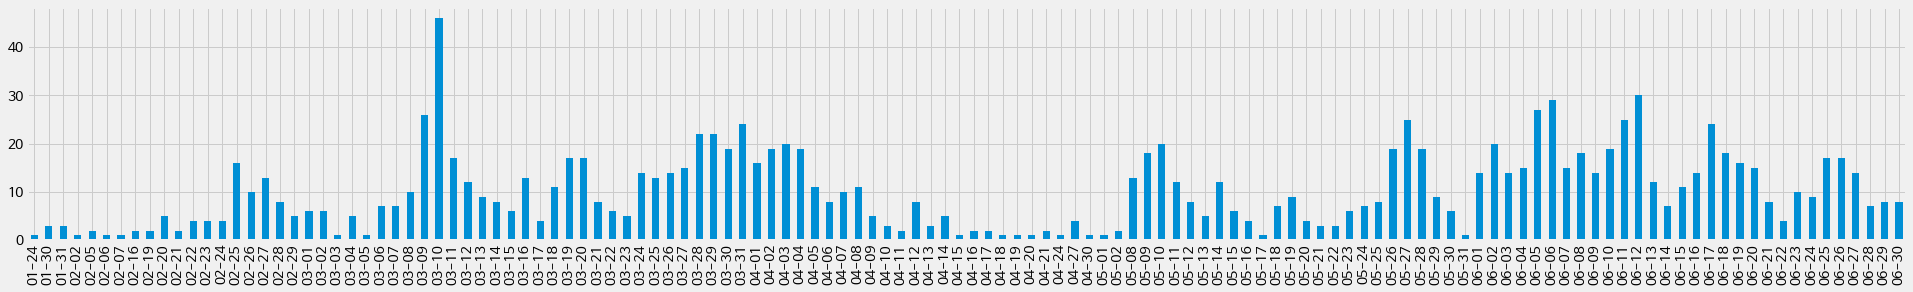

In [168]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.
day_count.plot.bar(figsize=(30,4))


### 최근 데이터만 슬라이싱으로 나눠 그리기

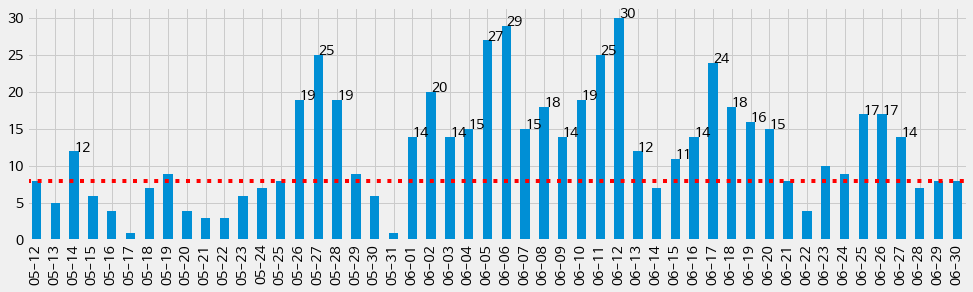

In [178]:
# 슬라이싱을 통해 최근 데이터만 그립니다.
#day_count[:50] # 50일치 데이터
#day_count[:50].plot.bar(figsize=(15,4))  # 앞에서 50일 치 데이터

g = day_count[-50:].plot.bar(figsize=(15,4))  # 마지막 50개 
#g.axhline(8, linestyle=":", color="red") # 8위치에  red 선을 점선으로 표현
g.axhline(day_count.median(), linestyle=":", color="red") 
# day_count의 중위값을  선이 들어가는 위치로 지정할때 

for i in range(50):
  case_count = day_count[-50:].iloc[i]
  if case_count > 10:
    g.text(x=i, y=case_count, s=case_count) 

### 월별 확진자 수 그리기

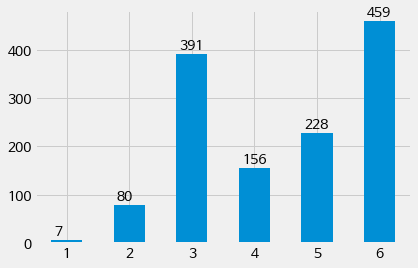

In [195]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

#df
# month_case = df["월"].value_counts()
# month_case.plot()  #확진자수가 많은 순서대로 그래프를 그려준다.

#월별로 나오게 하고 싶다면 sort_index()를 적용시켜 월별로 출력 시켜준다.
month_case = df["월"].value_counts().sort_index()  
#month_case.plot()
#month_case.plot.bar() # 글자가 누워있음

# month_case.plot.bar(rot=0)
# g.text(x=1,y=1, s=1 )
# 이걸 합쳐서 
g= month_case.plot.bar(rot=0)

# for i in range(len(month_case)):
#   g.text(x=i, y=month_case.iloc[i], s=month_case.iloc[i]) #만약 숫자를 가운데 오고 싶다.

for i in range(len(month_case)):
  g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i]) #이렇게 수정해서 출력


### 주단위 확진자수 그리기

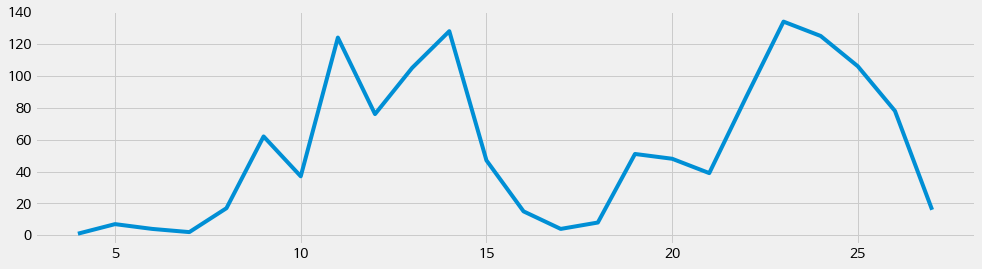

In [205]:
# 주별로 빈도수를 구합니다.

#df
#week_case = df["주"].value_counts()  value_counts 는 series 만 카운트 할 수 있다.
#week_case.plot()  #확진자수가 많은 순서대로 그래프를 그려준다.

#주별로 나오게 하고 싶다면 sort_index()를 적용시켜 월별로 출력 시켜준다.
weekly_case = df["주"].value_counts().sort_index()  
weekly_case.plot(figsize=(15,4))


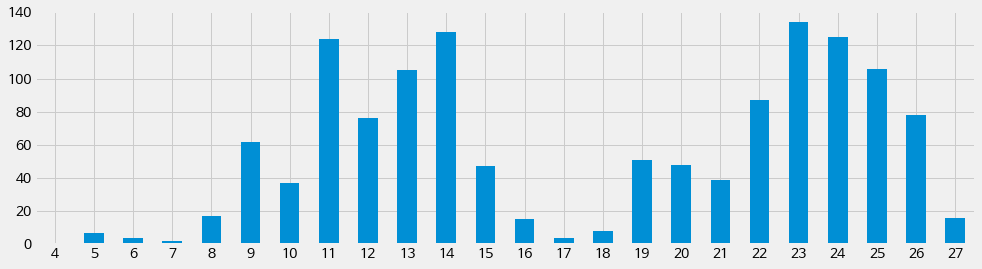

In [207]:
# 주단위 빈도수 막대그래프로 그리기
weekly_case.plot.bar(rot=0 , figsize=(15,4))

### 월-주 함께 그리기

In [218]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 계산합니다.
# 원래 value_counts() 는  list 타입만 (series) 카운트 했었는데  
# 1.1.0버전 이후  dataframe 도 지원된다. 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
#df[["월", "주"]].value_counts() 
# = df[["월", "주"]].value_counts()

#예전에는 이런 방법으로 카운트를 했다. groupby 는 series 로 반환한다.
#df.groupby(["월","주"])["연번"].count()  
month_weekly_case = df.groupby(["월","주"])["연번"].count() 

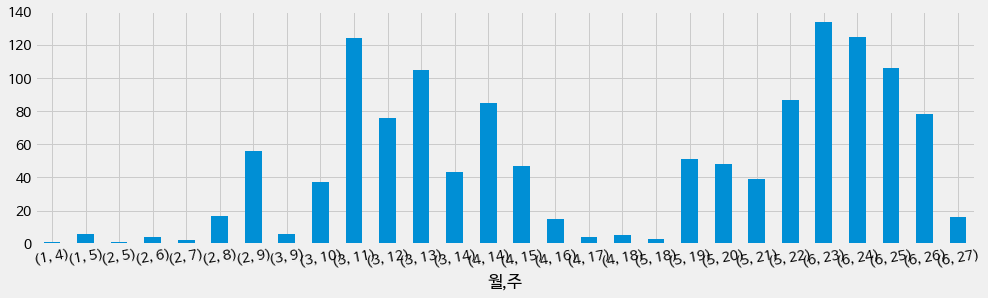

In [223]:
# 월-주 를 함께 그래프에 표현하기


month_weekly_case.plot.bar(figsize=(15,4), rot=10)

## 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

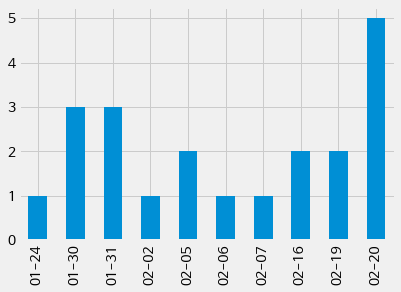

In [227]:
#df
#day_count.plot.bar()  # 너무 많다.
day_count[:10].plot.bar() # 중간에 빈 날짜는 출력 하지 않는다. 


In [237]:
# 첫 확진일 부터 마지막 확진일까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.

#df.iloc[-1] # 맨 처음 날짜 정보만 출력  , 확진일자가 나오는 부분이 7 번째
first_day = df.iloc[-1,7]

last_day = df.iloc[0,7]

#또는 
#last_day = df.iloc[0],['확진일자']

In [235]:
%timeit first_day = df.iloc[-1,7]  # 수차래 실행 후 실행의 평균을 보여줌

The slowest run took 10.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 45.2 µs per loop


In [236]:
%timeit last_day = df.iloc[0],['확진일자']

The slowest run took 27.62 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 146 µs per loop


In [239]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days[:5]

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28'],
              dtype='datetime64[ns]', freq='D')

In [244]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days 는 series 형태이기 때무네 merge 를 할 수 없다.
# days.to_frame()     #1번째 방법
pd.DataFrame(days)    # 2번째 방법  
df_days = pd.DataFrame({"확진일자" : days})  # 컬럼 변경
df_days.head()


,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [246]:
# 확진일자별로 빈도수 구하기
daily_case = df["확진일자"].value_counts()
daily_case.head()


2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [248]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기

df_daily_case = daily_case.to_frame()
df_daily_case.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [249]:
# value_counts 결과의 컬럼명을 "확진수" 로 바꾸기


df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


### merge 를 통해 전체 확진일자 만들기
* 이미지 출처 및 Pandas 공식문서 보기 : [How to combine data from multiple tables? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/08_combine_dataframes.html#join-tables-using-a-common-identifier)

<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">

* 두개의 dataframe 이 있을 경우 하나의 컬럼을 키 값으로 사용
* 즉 키값을 기준으로 두 dataframe을 합치는거
* df.merge(dataframe1, dataframe2)


In [253]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.

# df_days.merge(df_daily_case)   # 에러가 발생 
#df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index)  
# merge 의 how 는 (left, right, outer, inner ) 가 있다.
# left 왼쪽에 있는 데이터를 기준으로 합치고 싶을때 
# right 오른쪽에 있는 데이터를 기준으로 합치고 싶을때 
# outer 양쪽에 있는 데이터를 다써서  합치고 싶을때 
# inner 가 default 


all_day = df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index, how='left')
all_day.head()


,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
